## Multilayer Perceptron (Default vs Xavier Initialization)

Notebook Set-Up and Imports


---






In [1]:
!pip install mxnet==1.6.0
!pip install -U d2l

     |████████████████████████████████| 68.7MB 47kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 61kB 3.3MB/s 


In [2]:
%matplotlib inline
from d2l import torch as d2l
import torch
from torch import nn
import math

Training a multilayer perceptron on FashionMNIST data with "Default Initialization"

---



In [3]:
dropout1, dropout2 = 0.2, 0.5

net1 = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # Add a dropout layer after the first fully connected layer
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # Add a dropout layer after the second fully connected layer
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

In [4]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)

In [5]:
net1.apply(init_weights)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

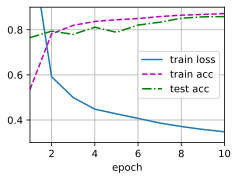

In [6]:
# training and testing
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net1.parameters(), lr=lr)
d2l.train_ch3(net1, train_iter, test_iter, loss, num_epochs, trainer)



---


**Assignment**: Implement Xavier Initialization and show example of how to apply it similar to the above code.


---



---



**Assignment Solution**

Below approach has been followed for Xavier Initialization :

*   There are two ways to do Xavier Initialization : using normal distribution or by using normla distribution.
*   In both the cases we need to know number of input and output nodes connected to weight parameters. We use 'shape' of weight matrix to get these.
*   *net1* : Default initialization technique used here.
*   *net2* : We set std-dev = sqrt(2/(in+out)) and initialize using normal distribution.
*   *net3* : We use a = sqrt(6/(in+out)) to generate uniformly distributed numbers in range [-a,a] to demonstrate use of uniform distribution to initialize.


Training a multilayer perceptron on FashionMNIST data with "Xavier Initialization" implemented from scratch

---



In [11]:
def init_xavier(m, gain=1., normal=True):
    '''
    Implementation of Xavier Initialization
    normal : if False, uniform distribution is used for weight initialization
    '''
    if type(m) == nn.Linear:
        n_in, n_out = m.weight.shape[1], m.weight.shape[0]
        std_dev = gain * math.sqrt(2.0/float(n_in+n_out))
        if normal:
            torch.nn.init.normal_(m.weight, std=std_dev)
        else:
            a = math.sqrt(3.0) * std_dev
            torch.nn.init.uniform_(m.weight, -a, a)

In [12]:
dropout1, dropout2 = 0.2, 0.5

net2 = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # Add a dropout layer after the first fully connected layer
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # Add a dropout layer after the second fully connected layer
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

In [13]:
net2.apply(init_xavier)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

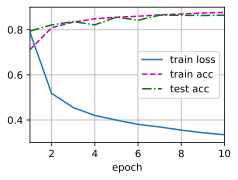

In [14]:
# training and testing
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net2.parameters(), lr=lr)
d2l.train_ch3(net2, train_iter, test_iter, loss, num_epochs, trainer)

In [15]:
net3 = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # Add a dropout layer after the first fully connected layer
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # Add a dropout layer after the second fully connected layer
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

In [16]:
net3.apply(lambda x:init_xavier(x, normal=False))

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

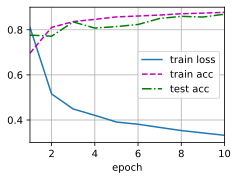

In [17]:
# training and testing
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net3.parameters(), lr=lr)
d2l.train_ch3(net3, train_iter, test_iter, loss, num_epochs, trainer)

Training a multilayer perceptron on FashionMNIST data with pytorch built-in "Xavier Initialization"

---



In [20]:
net4 = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # Add a dropout layer after the first fully connected layer
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # Add a dropout layer after the second fully connected layer
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

In [21]:
def init_torchxav(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight, gain=nn.init.calculate_gain('relu'))

net4.apply(init_torchxav)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

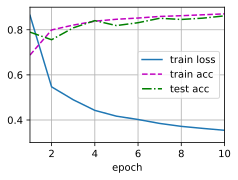

In [22]:
# training and testing
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net4.parameters(), lr=lr)
d2l.train_ch3(net4, train_iter, test_iter, loss, num_epochs, trainer)

References :


*   https://d2l.ai/chapter_multilayer-perceptrons/numerical-stability-and-init.html
*   https://prateekvjoshi.com/2016/03/29/understanding-xavier-initialization-in-deep-neural-networks/
*   https://github.com/pytorch/pytorch/blob/master/torch/nn/init.py

